In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
AI_project = pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv', encoding='latin-1')
AI_project.head()


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


### Treat missing values

Check if there are missing values:

In [4]:
AI_project.isnull().sum().sort_values(ascending=False)

Medal           117
Event_gender    117
Country         117
Country_Code    117
Gender          117
Athlete         117
Event           117
Discipline      117
Sport           117
Year            117
City            117
dtype: int64

We have 117 missing values in the data we will remove them with dropna. 

In [5]:
AI_project=AI_project.dropna()
AI_project.isnull().sum().sort_values(ascending=False)

Medal           0
Event_gender    0
Country         0
Country_Code    0
Gender          0
Athlete         0
Event           0
Discipline      0
Sport           0
Year            0
City            0
dtype: int64

### Fixing data types
Check if any of the data types need to be fixed:

In [6]:
AI_project.dtypes

City             object
Year            float64
Sport            object
Discipline       object
Event            object
Athlete          object
Gender           object
Country_Code     object
Country          object
Event_gender     object
Medal            object
dtype: object

In [7]:
AI_project['Year'] = AI_project['Year'].astype(int)  
AI_project.dtypes

City            object
Year             int32
Sport           object
Discipline      object
Event           object
Athlete         object
Gender          object
Country_Code    object
Country         object
Event_gender    object
Medal           object
dtype: object

As we can see all the data contains string value except the "Year" column,we changed the "Year" column from float to int because year is a natural number.

### Women in the olyimpic trough the Years
We wanted to check the growth in women participaints in the olyimpic trough the years.
In order to to so we made a new data frame wich contain the amount of men and women that won medal in each olyimpic and the ratio between them.

In [8]:
CHECK_M_F = AI_project.copy()
Gender_df = pd.get_dummies(CHECK_M_F['Gender'])#Makes gender numeric
CHECK_M_F = pd.concat([CHECK_M_F,Gender_df],axis=1)#concat between 2 data frames
Men_Woman_df = CHECK_M_F.pivot_table(['Men','Women'],'Year',aggfunc='sum')#creat a new data frame with the winners in each olyimpic separated by gender
gym1 = Men_Woman_df
gym2=((Men_Woman_df['Men'] / Men_Woman_df['Men'].sum()) * 100)#Calculate ratio men
gym3 = ((Men_Woman_df['Women'] / Men_Woman_df['Women'].sum()) * 100)#Calculate ratio women
gym2 = pd.concat([gym2,gym3],axis=1)
gym2=gym2.rename(columns={"Men": "Ratio Men", "Women": "Ratio Women"})
Men_Woman_df = pd.concat([gym1,gym2],axis=1)
Men_Woman_df

,Men,Women,Ratio Men,Ratio Women
Year,,,,
1976,924.0,381.0,9.842352,6.427126
1980,958.0,429.0,10.204516,7.236842
1984,973.0,486.0,10.364295,8.198381
1988,1011.0,535.0,10.769067,9.024966
1992,1105.0,600.0,11.770345,10.121457
1996,1082.0,777.0,11.525352,13.107287
2000,1126.0,889.0,11.994035,14.996626
2004,1099.0,899.0,11.706434,15.165317
2008,1110.0,932.0,11.823605,15.721997


### Polts for the Number of winners in each olympic and Ratio of winners in each olympic

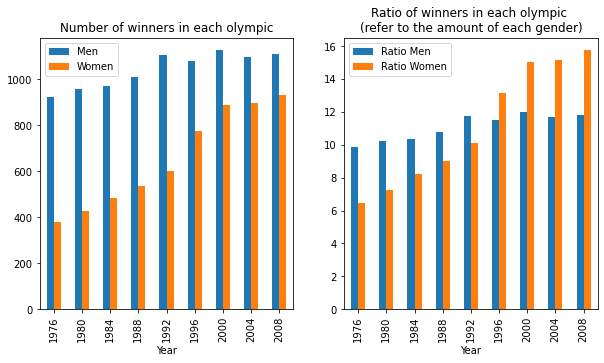

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2)
gym1.plot.bar(ax=axes[0],figsize=(10,5))#Amount of Winners
axes[0].set_title("Number of winners in each olympic")
axes[1].set_title("Ratio of winners in each olympic \n(refer to the amount of each gender)")
gym2.plot.bar(ax=axes[1],figsize=(10,5))#Ratio of Winners


As we can see in the dataframe and the plots the number of winners among women is incrasing each olympic, that refer to the equal rights for both men and women through the years.

In [25]:
gender_group = AI_project.groupby(['Year', 'Gender','Sport']).size().unstack()
gender_group = gender_group.fillna(0)
year_g = [1976," ",1980, " ",1984, " ",1988, " ",1992, " ",1996," "" " ,2000, " ",2004," " ,2008, " "]
gender_group['Year'] = year_g
gender_group
gender_group1 = gender_group[:82]
gender_group2 = gender_group[82:163]
gender_group3 = gender_group[163:]
gender_group
sns.lineplot(data = gender_group1, x = 'Year', y = Gender.Women, hue = 'Sport', style="Sport", markers=True, dashes=False)

NameError: name 'Gender' is not defined

<ipython-input-11-8eaf3e2d1f06>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men['m_Gender'] = 1
<ipython-input-11-8eaf3e2d1f06>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women['w_Gender'] = 1


Text(0.5, 1.0, 'Women winners by sport type')

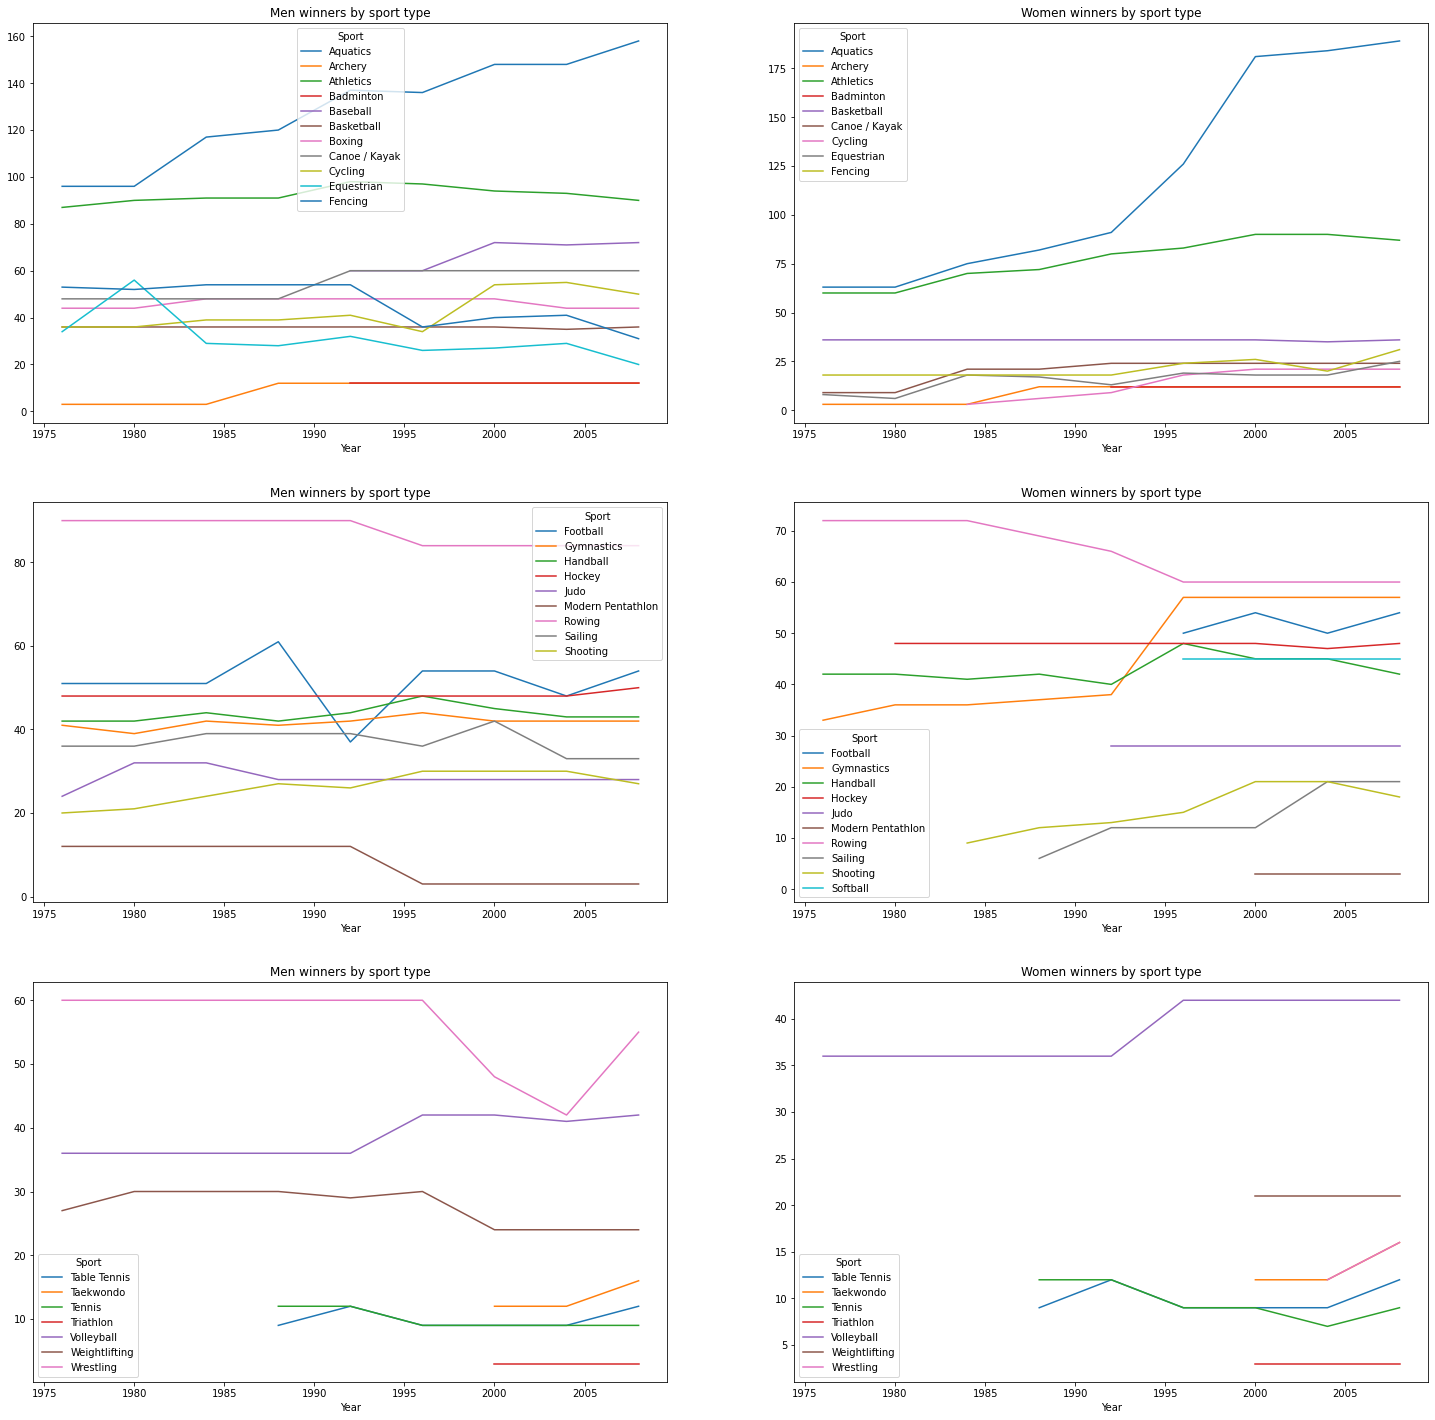

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=2)
# sns.lineplot(data = gender_group1, x = 'Year', y = 'Women', hue = 'Sport', style="Sport", markers=True, dashes=False)
men = AI_project[AI_project.Gender == 'Men']
women = AI_project[AI_project.Gender == 'Women']
men['m_Gender'] = 1
women['w_Gender'] = 1
x = men.pivot_table('m_Gender',index='Year',columns='Sport',aggfunc=lambda x: x.sum(axis=0))
y = women.pivot_table('w_Gender',index='Year',columns='Sport',aggfunc=lambda x: x.sum(axis=0))
x.loc[:,"Aquatics":"Fencing"].plot(ax=axes[0][0],figsize=(25,25)).set_title("Men winners by sport type")
y.loc[:,"Aquatics":"Fencing"].plot(ax=axes[0][1],figsize=(25,25)).set_title("Women winners by sport type")
x.loc[:,"Football":"Softball"].plot(ax=axes[1][0],figsize=(25,25)).set_title("Men winners by sport type")
y.loc[:,"Football":"Softball"].plot(ax=axes[1][1],figsize=(25,25)).set_title("Women winners by sport type")
x.loc[:,"Table Tennis":"Wrestling"].plot(ax=axes[2][0],figsize=(25,25)).set_title("Men winners by sport type")
y.loc[:,"Table Tennis":"Wrestling"].plot(ax=axes[2][1],figsize=(25,25)).set_title("Women winners by sport type")


### אנו רוצים למצוא קשר בין המדינה המארחת לבין מספר הזכיות באותה אולימפיאדה. 

נבדוק באיזה ערים היו האולמפיאדות

In [12]:
Sum_Of_Medals=AI_project['City'].value_counts()
Sum_Of_Medals

Beijing        2042
Sydney         2015
Athens         1998
Atlanta        1859
Barcelona      1705
Seoul          1546
Los Angeles    1459
Moscow         1387
Montreal       1305
Name: City, dtype: int64

In [13]:
Sum_Of_Medals_lst = [1305,1387,1459,1546,1705,1859,2015,1998,2042]
Country_lst = ['Canada','Soviet Union','United States','Korea, South','Spain','United States','Australia','Greece','China']

In [14]:
Home_A_df = AI_project.copy()
temp_Home_A_df= pd.get_dummies(Home_A_df['Country'])
Home_A_df = pd.concat([Home_A_df,temp_Home_A_df,],axis=1)
Home_A_df = Home_A_df.pivot_table(['United States','Australia','China','Korea, South','Spain','Canada','Soviet Union','Greece'],'Year',aggfunc='sum')
Home_A_df = Home_A_df.assign(Sum_Of_Medals = Sum_Of_Medals_lst,Country = Country_lst)
Home_A_df = Home_A_df[['Country','Sum_Of_Medals','Australia','Canada','China','Greece','Korea, South','Soviet Union','Spain','United States']]
Home_A_df

,Country,Sum_Of_Medals,Australia,Canada,China,Greece,"Korea, South",Soviet Union,Spain,United States
Year,,,,,,,,,,
1976,Canada,1305,24,20,0,0,17,285.0,6,155.0
1980,Soviet Union,1387,12,0,0,5,0,442.0,24,0.0
1984,United States,1459,50,86,76,2,42,0.0,19,333.0
1988,"Korea, South",1546,34,21,53,1,77,294.0,5,193.0
1992,Spain,1705,57,44,83,2,49,0.0,66,224.0
1996,United States,1859,132,51,110,8,66,0.0,67,260.0
2000,Australia,2015,183,31,79,18,73,0.0,43,248.0
2004,Greece,1998,157,17,94,31,52,0.0,27,264.0
2008,China,2042,149,34,184,7,78,0.0,71,315.0


In [15]:
Home_A_Ratio = Home_A_df.copy()
Home_A_Ratio_temp = Home_A_Ratio.loc[:,'Country']
ratio_Australia=((Home_A_Ratio['Australia'] / Home_A_Ratio['Sum_Of_Medals']) * 100)
ratio_Canada = ((Home_A_Ratio['Canada'] / Home_A_Ratio['Sum_Of_Medals']) * 100)
ratio_China = ((Home_A_Ratio['China'] / Home_A_Ratio['Sum_Of_Medals']) * 100)
ratio_Greece = ((Home_A_Ratio['Greece'] / Home_A_Ratio['Sum_Of_Medals']) * 100)
ratio_KoreaSouth = ((Home_A_Ratio['Korea, South'] / Home_A_Ratio['Sum_Of_Medals']) * 100)
ratio_Soviet_Union = ((Home_A_Ratio['Soviet Union'] / Home_A_Ratio['Sum_Of_Medals']) * 100)
ratio_Spain = ((Home_A_Ratio['Spain'] / Home_A_Ratio['Sum_Of_Medals']) * 100)
ratio_United_States = ((Home_A_Ratio['United States'] / Home_A_Ratio['Sum_Of_Medals']) * 100)
ratio = pd.concat([ratio_Australia,ratio_Canada,ratio_China,ratio_Greece,ratio_KoreaSouth,ratio_Soviet_Union,ratio_Spain,ratio_United_States],axis=1)
ratio=ratio.rename(columns={0:"Ratio Australia",1: "Ratio Canada",2: "Ratio China",3: "Ratio Greece",4: "Ratio Korea, South",5: "Ratio Soviet Union",6: "Ratio Spain",7: "Ratio United States"})
year = [1976,1980,1984,1988,1992,1996,2000,2004,2008]
Home_A_Ratio = pd.concat([Home_A_Ratio_temp,ratio],axis=1)
Home_A_Ratio["Year"] = year#in order to make a plot
Home_A_Ratio

,Country,Ratio Australia,Ratio Canada,Ratio China,Ratio Greece,"Ratio Korea, South",Ratio Soviet Union,Ratio Spain,Ratio United States,Year
Year,,,,,,,,,,
1976,Canada,1.839080,1.532567,0.000000,0.000000,1.302682,21.839080,0.459770,11.877395,1976
1980,Soviet Union,0.865177,0.000000,0.000000,0.360490,0.000000,31.867340,1.730353,0.000000,1980
1984,United States,3.427005,5.894448,5.209047,0.137080,2.878684,0.000000,1.302262,22.823852,1984
1988,"Korea, South",2.199224,1.358344,3.428202,0.064683,4.980595,19.016818,0.323415,12.483829,1988
1992,Spain,3.343109,2.580645,4.868035,0.117302,2.873900,0.000000,3.870968,13.137830,1992
1996,United States,7.100592,2.743410,5.917160,0.430339,3.550296,0.000000,3.604088,13.986014,1996
2000,Australia,9.081886,1.538462,3.920596,0.893300,3.622829,0.000000,2.133995,12.307692,2000
2004,Greece,7.857858,0.850851,4.704705,1.551552,2.602603,0.000000,1.351351,13.213213,2004
2008,China,7.296768,1.665034,9.010774,0.342801,3.819785,0.000000,3.476983,15.426053,2008


### Scatter plots for the "home adventage"

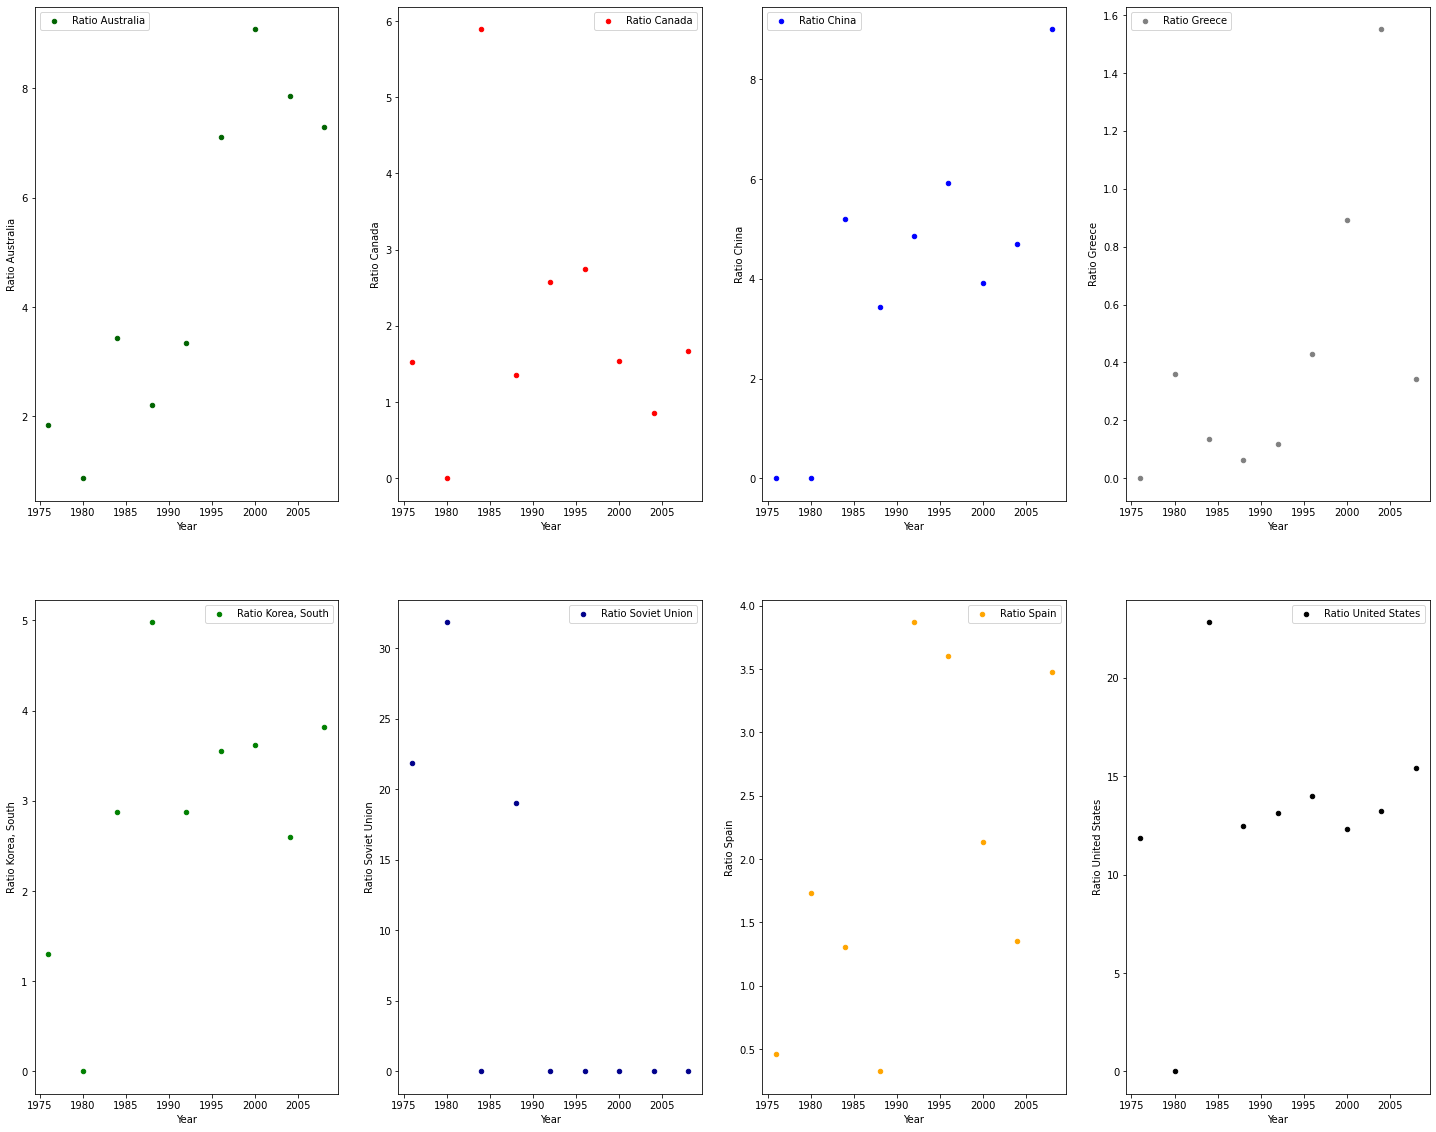

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=4)
Home_A_Ratio.plot.scatter(x="Year", y="Ratio Australia", color="DarkGreen", label="Ratio Australia",ax=axes[0][0],figsize=(25,20))
Home_A_Ratio.plot.scatter(x="Year", y="Ratio Canada", color="Red", label="Ratio Canada",ax=axes[0][1],figsize=(25,20))
Home_A_Ratio.plot.scatter(x="Year", y="Ratio China", color="Blue", label="Ratio China",ax=axes[0][2],figsize=(25,20))
Home_A_Ratio.plot.scatter(x="Year", y="Ratio Greece", color="Gray", label="Ratio Greece",ax=axes[0][3],figsize=(25,20))
Home_A_Ratio.plot.scatter(x="Year", y="Ratio Korea, South", color="Green", label="Ratio Korea, South",ax=axes[1][0],figsize=(25,20))
Home_A_Ratio.plot.scatter(x="Year", y="Ratio Soviet Union", color="DarkBlue", label="Ratio Soviet Union",ax=axes[1][1],figsize=(25,20))
Home_A_Ratio.plot.scatter(x="Year", y="Ratio Spain", color="Orange", label="Ratio Spain",ax=axes[1][2],figsize=(25,20))
Home_A_Ratio.plot.scatter(x="Year", y="Ratio United States", color="Black", label="Ratio United States",ax=axes[1][3],figsize=(25,20))






### Pie plots

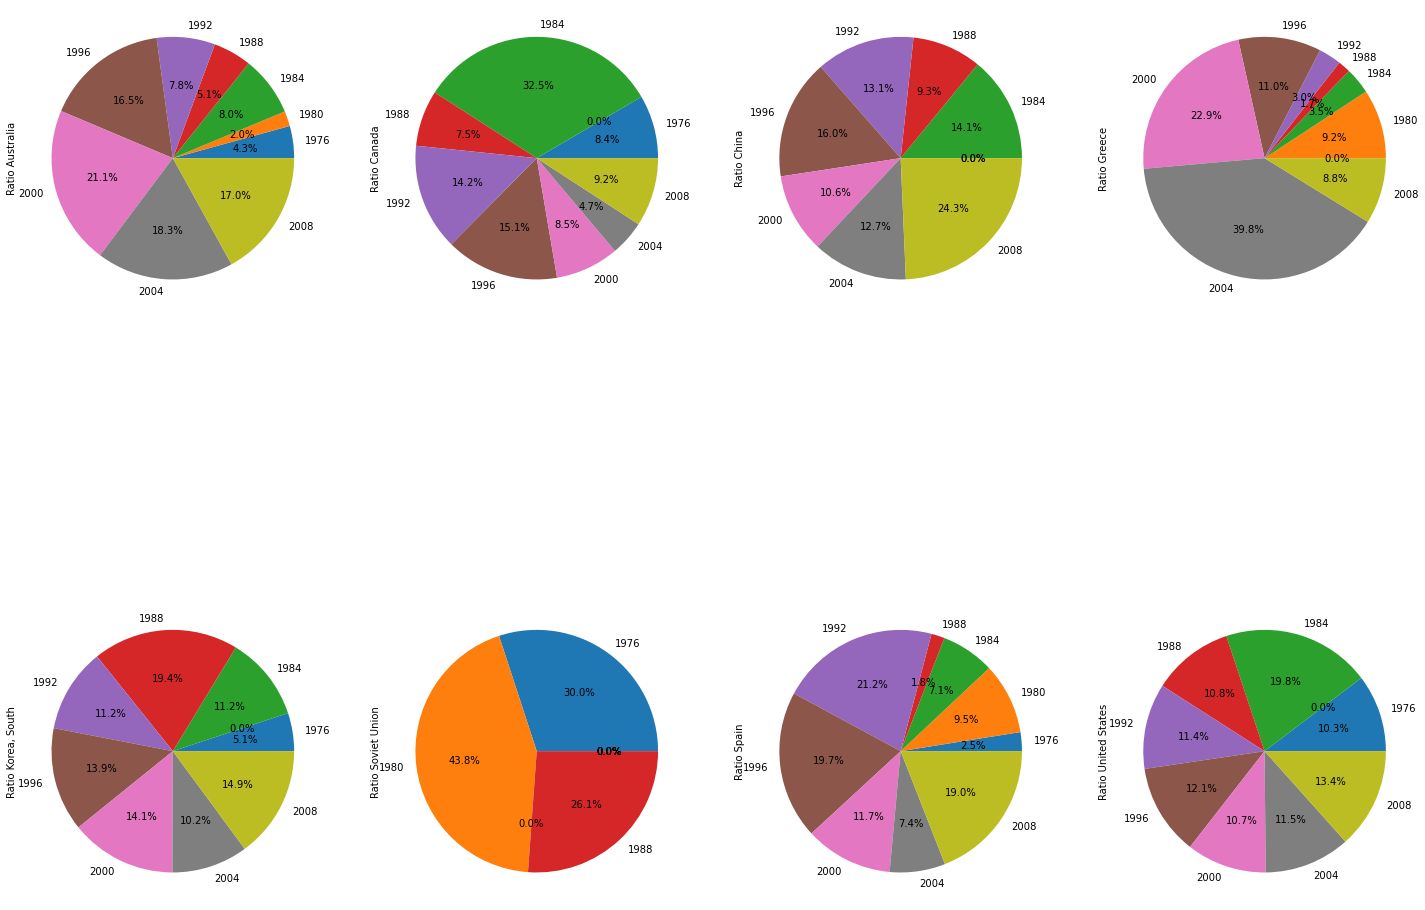

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=4)
Home_A_Ratio['Ratio Australia'].plot.pie(ax=axes[0][0],figsize=(25,20),autopct='%1.1f%%')
Home_A_Ratio['Ratio Canada'].plot.pie(ax=axes[0][1],figsize=(25,20),autopct='%1.1f%%')
Home_A_Ratio['Ratio China'].plot.pie(ax=axes[0][2],figsize=(25,20),autopct='%1.1f%%')
Home_A_Ratio['Ratio Greece'].plot.pie(ax=axes[0][3],figsize=(25,20),autopct='%1.1f%%')
Home_A_Ratio['Ratio Korea, South'].plot.pie(ax=axes[1][0],figsize=(25,20),autopct='%1.1f%%')
Home_A_Ratio['Ratio Soviet Union'].plot.pie(ax=axes[1][1],figsize=(25,20),autopct='%1.1f%%')
Home_A_Ratio['Ratio Spain'].plot.pie(ax=axes[1][2],figsize=(25,20),autopct='%1.1f%%')
Home_A_Ratio['Ratio United States'].plot.pie(ax=axes[1][3],figsize=(25,20),autopct='%1.1f%%')


